In [41]:
pip install fbprophet

     ---------------------------------------- 0.0/64.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/64.0 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 64.0/64.0 kB 680.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/5.8 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.8 MB 6.7 MB/s eta 0:00:01
     ----- ---------------------------------- 0.8/5.8 MB 8.9 MB/s eta 0:00:01
     ------- -------------------------------- 1.1/5.8 MB 10.1 MB/s eta 0:00:01
     --------- ------------------------------ 1.3/5.8 MB 6.9 MB/s eta 0:00:01
     ------------ --------------------------- 1.8/5.8 MB 7.8 MB/s eta 0:00:01
     ------------- -------------------------- 2.0/5.8 MB 7.9 MB/s eta 0:00:01
     --------------- ------------------------ 2.2/5.8 MB 7.0 MB/s eta 0:00:01
     ---------------- ----------------------- 2.

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [58 lines of output]
  C:\Users\tech\AppData\Local\Temp\pip-install-bqkvt8zk\fbprophet_d1909218bffb4f529f181cf96f9b4534\setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    from pkg_resources import (
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  NumExpr defaulting to 4 threads.
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\tech\AppData\Local\Temp\pip-install-bqkvt8zk\fbprophet_d1909218bffb4f529f181cf96f9b4534\setup.py", line 122, in <module>
      setup(
    File "C:\anaconda\Lib\site-packages\setuptools\__init__.py", line 104, in setup
      return distutils.c

In [42]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
# from fbprophet import Prophet
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
gen_data = pd.read_csv('/Users/tech/Documents/Jupyter Notebook/DataSet/SolarPower/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('/Users/tech/Documents/Jupyter Notebook/DataSet/SolarPower/Plant_1_Weather_Sensor_Data.csv')

In [4]:
gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'], format='%d-%m-%Y %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

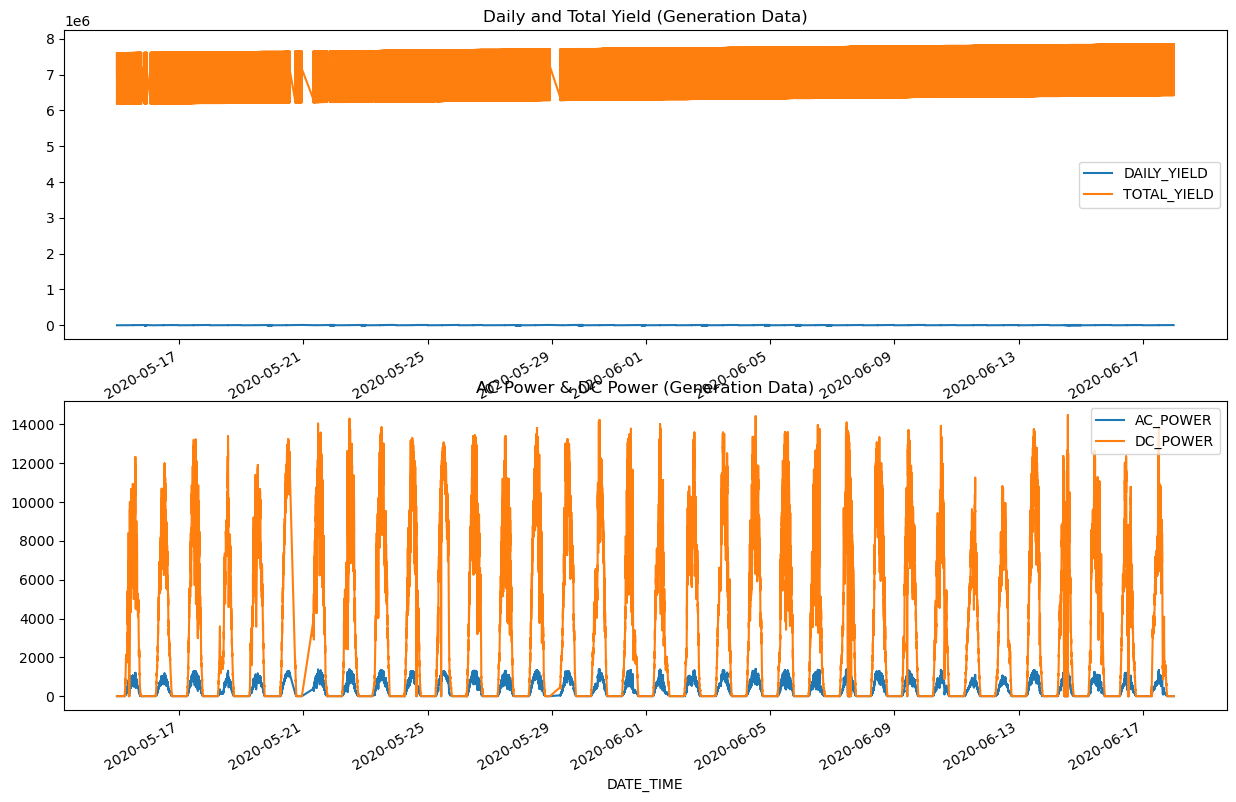

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
gen_data.plot(x='DATE_TIME', y=['DAILY_YIELD', 'TOTAL_YIELD'], ax=ax[0], title="Daily and Total Yield (Generation Data)")
gen_data.plot(x='DATE_TIME', y=['AC_POWER', 'DC_POWER'], ax=ax[1], title="AC Power & DC Power (Generation Data)")
plt.show()

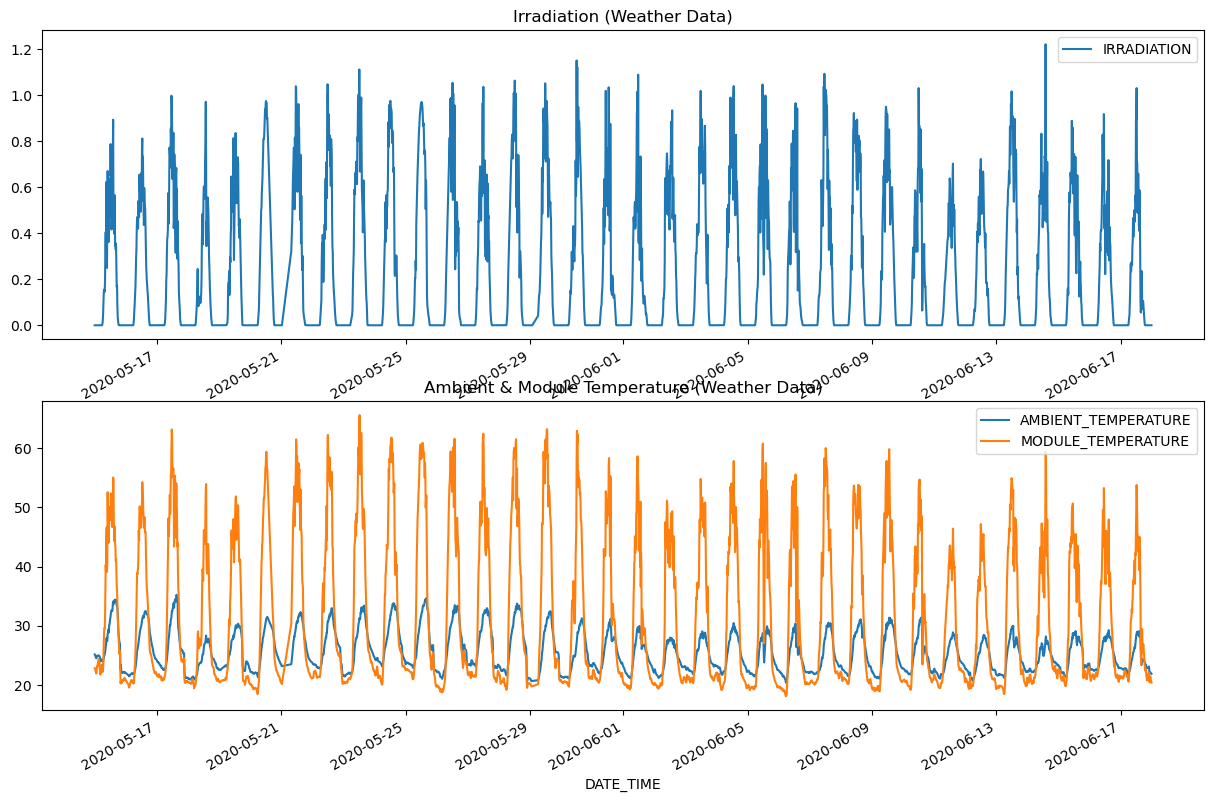

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
weather_data.plot(x='DATE_TIME', y='IRRADIATION', ax=ax[0], title="Irradiation (Weather Data)")
weather_data.plot(x='DATE_TIME', y=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'], ax=ax[1], title="Ambient & Module Temperature (Weather Data)")
plt.show()

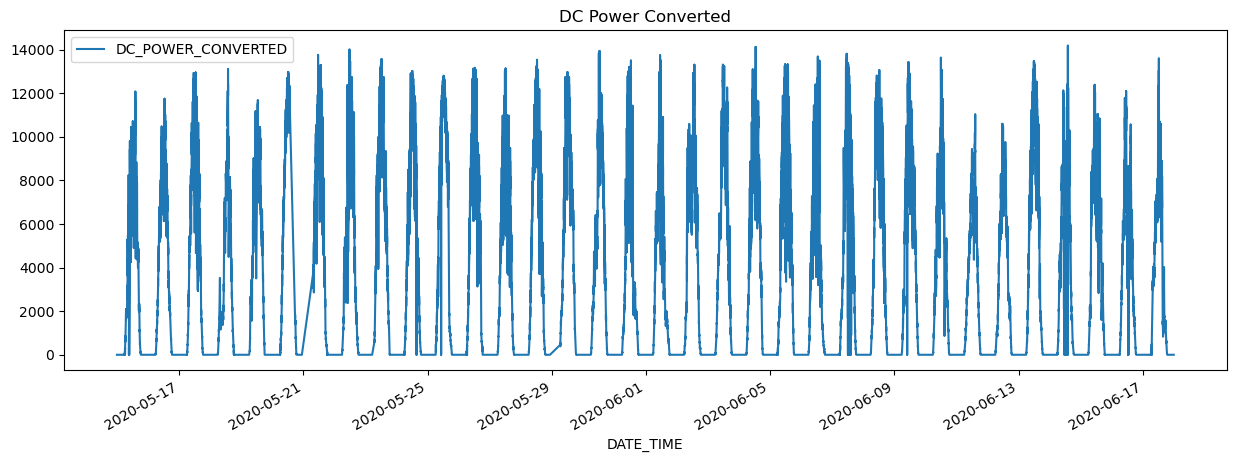

In [7]:
gen_data['DC_POWER_CONVERTED'] = gen_data['DC_POWER'] * 0.98  # Assume 2% loss in conversion
fig, ax = plt.subplots(figsize=(15, 5))
gen_data.plot(x='DATE_TIME', y='DC_POWER_CONVERTED', ax=ax, title="DC Power Converted")
plt.show()

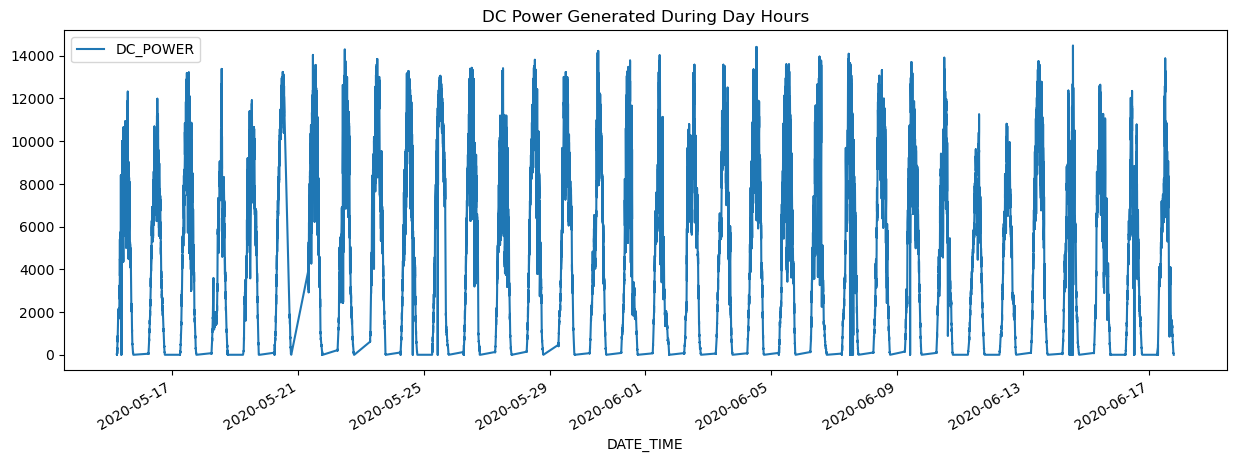

In [8]:
day_data_gen = gen_data[(gen_data['DATE_TIME'].dt.hour >= 6) & (gen_data['DATE_TIME'].dt.hour <= 18)]
fig, ax = plt.subplots(figsize=(15, 5))
day_data_gen.plot(x='DATE_TIME', y='DC_POWER', ax=ax, title="DC Power Generated During Day Hours")
plt.show()

In [9]:
inverter_performance = gen_data.groupby('SOURCE_KEY')['DC_POWER'].mean().sort_values()
print(f"Underperforming inverter: {inverter_performance.idxmin()}")

Underperforming inverter: bvBOhCH3iADSZry


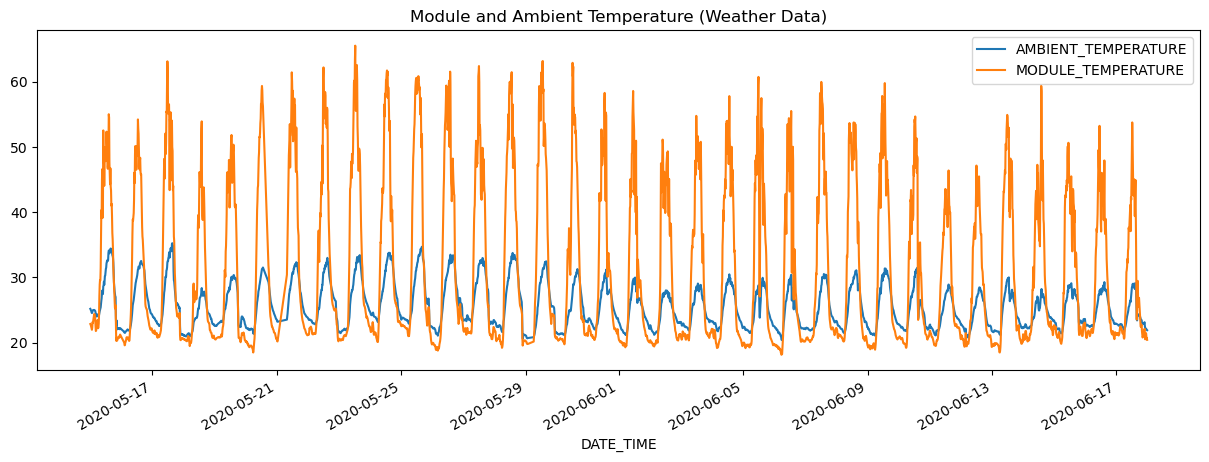

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
weather_data.plot(x='DATE_TIME', y=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'], ax=ax, title="Module and Ambient Temperature (Weather Data)")
plt.show()

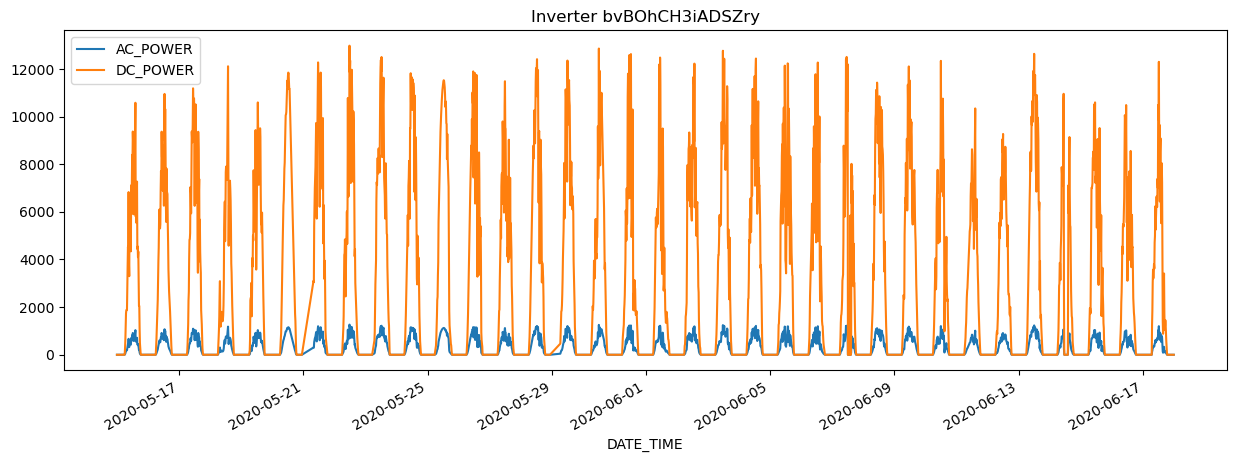

In [21]:
inverter_data = gen_data[gen_data['SOURCE_KEY'] == 'bvBOhCH3iADSZry']
fig, ax = plt.subplots(figsize=(15, 5))
inverter_data.plot(x='DATE_TIME', y=['AC_POWER', 'DC_POWER'], ax=ax, title="Inverter bvBOhCH3iADSZry")
plt.show()

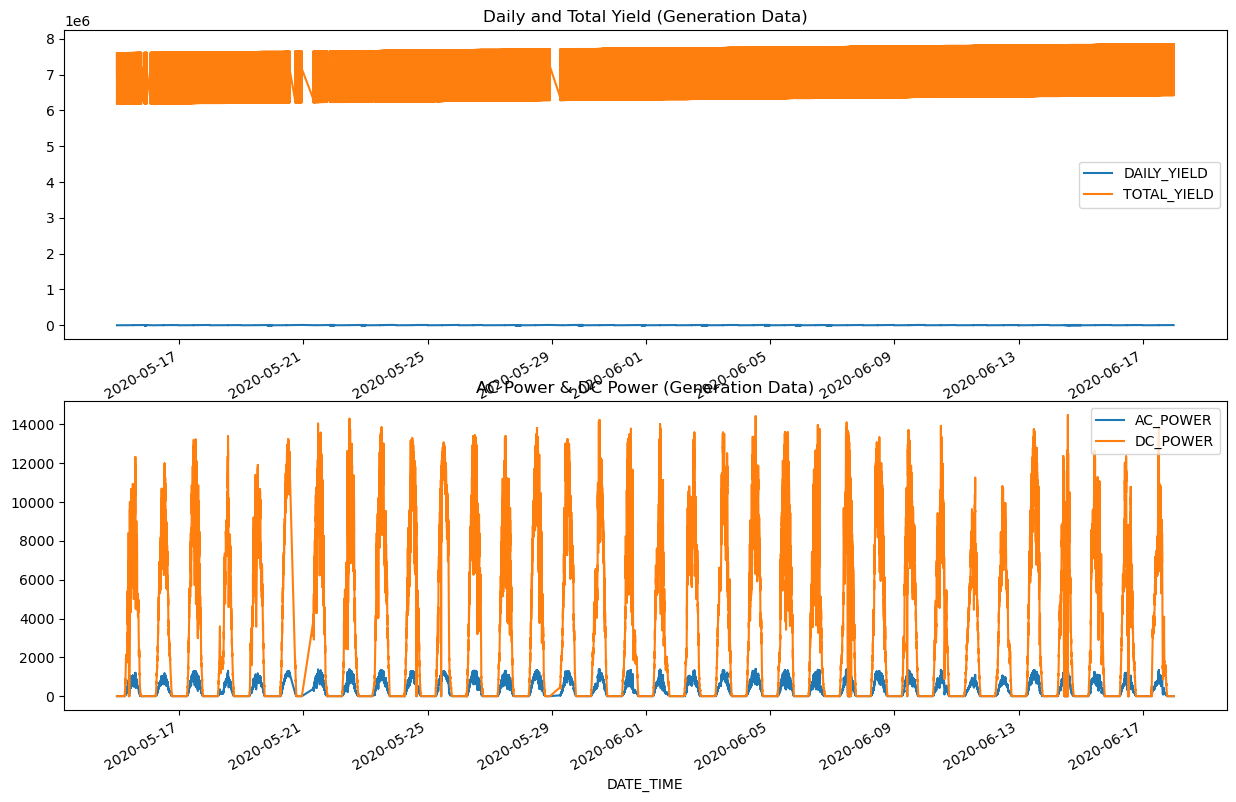

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
gen_data.plot(x='DATE_TIME', y=['DAILY_YIELD', 'TOTAL_YIELD'], ax=ax[0], title="Daily and Total Yield (Generation Data)")
gen_data.plot(x='DATE_TIME', y=['AC_POWER', 'DC_POWER'], ax=ax[1], title="AC Power & DC Power (Generation Data)")
plt.show()

In [22]:
df_daily_gen = gen_data_daily[['DATE_TIME', 'DAILY_YIELD']].set_index('DATE_TIME')

In [23]:
result = adfuller(df_daily_gen['DAILY_YIELD'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -4.753753588920745
p-value: 6.661765948296561e-05


In [24]:
train_gen, test_gen = train_test_split(df_daily_gen, test_size=0.2, shuffle=False)

In [25]:
arima_model_gen = ARIMA(train_gen['DAILY_YIELD'], order=(5, 1, 0))
arima_fit_gen = arima_model_gen.fit()
forecast_arima_gen = arima_fit_gen.forecast(steps=len(test_gen))
test_gen['Forecast_ARIMA'] = forecast_arima_gen

C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


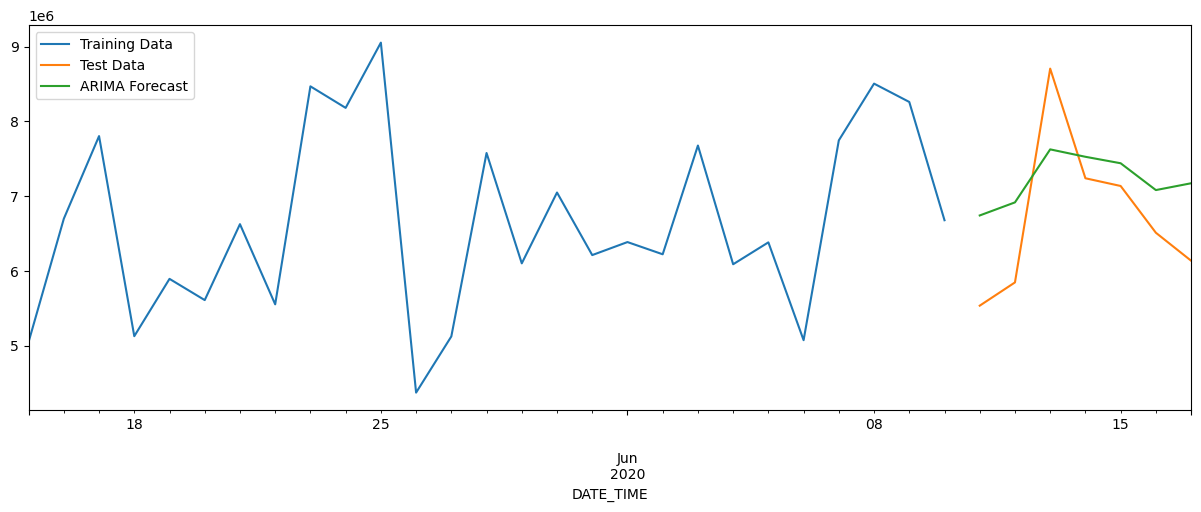

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))
train_gen['DAILY_YIELD'].plot(ax=ax, label='Training Data')
test_gen['DAILY_YIELD'].plot(ax=ax, label='Test Data')
test_gen['Forecast_ARIMA'].plot(ax=ax, label='ARIMA Forecast')
plt.legend()
plt.show()

In [28]:
auto_arima_model_gen = auto_arima(train_gen['DAILY_YIELD'], seasonal=False, stepwise=True)
auto_arima_model_gen.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   27
Model:                        SARIMAX   Log Likelihood                -416.926
Date:                Sun, 20 Oct 2024   AIC                            837.851
Time:                        06:47:10   BIC                            840.443
Sample:                    05-15-2020   HQIC                           838.622
                         - 06-10-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.651e+06    2.4e+05     27.692      0.000    6.18e+06    7.12e+06
sigma2      1.514e+12   5.77e+11      2.623      0.009    3.82e+11    2.64e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.64   Prob(JB):                         0.56
Heteroskedasticity (H):               0.92   Skew:                             0.17
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# conda install libpython m2w64-toolchain -c msys2

conda install libpython m2w64-toolchain -c msys2
pip install prophet

conda install libpython m2w64-toolchain -c msys2
Channels:
 - msys2
 - defaults
Platform: win-64
Collecting package metadata (repodata.json): done
Solving environment: done

## Package Plan ##

  environment location: C:\anaconda

  added / updated specs:
    - libpython
    - m2w64-toolchain


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.9.24  |       haa95532_0         131 KB
    certifi-2024.8.30          |  py312haa95532_0         164 KB
    conda-24.9.2               |  py312haa95532_0         1.2 MB
    libpython-2.1              |  py312haa95532_0          51 KB
    m2w64-binutils-2.25.1      |                5        44.3 MB  msys2
    m2w64-bzip2-1.0.6          |                6         100 KB  msys2
    m2w64-crt-git-5.0.0.4636.2595836|                2         3.4 MB  msys2
    m2w64-gcc-5.3.0            |                6        41.1 MB  msys2
    m2w64-gcc-ada-5.3.0        |                6        33.5 MB  msys2
    m2w64-gcc-fortran-5.3.0    |                6        10.3 MB  msys2
    m2w64-gcc-libgfortran-5.3.0|                6         340 KB  msys2
    m2w64-gcc-libs-5.3.0       |                7         518 KB  msys2
    m2w64-gcc-libs-core-5.3.0  |                7         213 KB  msys2
    m2w64-gcc-objc-5.3.0       |                6        15.1 MB  msys2
    m2w64-gmp-6.1.0            |                2         689 KB  msys2
    m2w64-headers-git-5.0.0.4636.c0ad18a|                2         5.6 MB  msys2
    m2w64-isl-0.16.1           |                2         655 KB  msys2
    m2w64-libiconv-1.14        |                6         1.5 MB  msys2
    m2w64-libmangle-git-5.0.0.4509.2e5a9a2|                2          21 KB  msys2
    m2w64-make-4.1.2351.a80a8b8|                2         116 KB  msys2
    m2w64-mpc-1.0.3            |                3          70 KB  msys2
    m2w64-mpfr-3.1.4           |                4         293 KB  msys2
    m2w64-pkg-config-0.29.1    |                2         469 KB  msys2
    m2w64-toolchain-5.3.0      |                7           2 KB  msys2
    m2w64-tools-git-5.0.0.4592.90b8472|                2         314 KB  msys2
    m2w64-windows-default-manifest-6.4|                3           3 KB  msys2
    m2w64-winpthreads-git-5.0.0.4634.697f757|                2          45 KB  msys2
    m2w64-zlib-1.2.8           |               10         197 KB  msys2
    openssl-3.0.15             |       h827c3e9_0         7.8 MB
    ------------------------------------------------------------
                                           Total:       168.1 MB

The following NEW packages will be INSTALLED:

  libpython          pkgs/main/win-64::libpython-2.1-py312haa95532_0
  m2w64-binutils     msys2/win-64::m2w64-binutils-2.25.1-5
  m2w64-bzip2        msys2/win-64::m2w64-bzip2-1.0.6-6
  m2w64-crt-git      msys2/win-64::m2w64-crt-git-5.0.0.4636.2595836-2
  m2w64-gcc          msys2/win-64::m2w64-gcc-5.3.0-6
  m2w64-gcc-ada      msys2/win-64::m2w64-gcc-ada-5.3.0-6
  m2w64-gcc-fortran  msys2/win-64::m2w64-gcc-fortran-5.3.0-6
  m2w64-gcc-libgfor~ msys2/win-64::m2w64-gcc-libgfortran-5.3.0-6
  m2w64-gcc-libs     msys2/win-64::m2w64-gcc-libs-5.3.0-7
  m2w64-gcc-libs-co~ msys2/win-64::m2w64-gcc-libs-core-5.3.0-7
  m2w64-gcc-objc     msys2/win-64::m2w64-gcc-objc-5.3.0-6
  m2w64-gmp          msys2/win-64::m2w64-gmp-6.1.0-2
  m2w64-headers-git  msys2/win-64::m2w64-headers-git-5.0.0.4636.c0ad18a-2
  m2w64-isl          msys2/win-64::m2w64-isl-0.16.1-2
  m2w64-libiconv     msys2/win-64::m2w64-libiconv-1.14-6
  m2w64-libmangle-g~ msys2/win-64::m2w64-libmangle-git-5.0.0.4509.2e5a9a2-2
  m2w64-make         msys2/win-64::m2w64-make-4.1.2351.a80a8b8-2
  m2w64-mpc          msys2/win-64::m2w64-mpc-1.0.3-3
  m2w64-mpfr         msys2/win-64::m2w64-mpfr-3.1.4-4
  m2w64-pkg-config   msys2/win-64::m2w64-pkg-config-0.29.1-2
  m2w64-toolchain    msys2/win-64::m2w64-toolchain-5.3.0-7
  m2w64-tools-git    msys2/win-64::m2w64-tools-git-5.0.0.4592.90b8472-2
  m2w64-windows-def~ msys2/win-64::m2w64-windows-default-manifest-6.4-3
  m2w64-winpthreads~ msys2/win-64::m2w64-winpthreads-git-5.0.0.4634.697f757-2
  m2w64-zlib         msys2/win-64::m2w64-zlib-1.2.8-10

The following packages will be UPDATED:

  ca-certificates                      2024.3.11-haa95532_0 --> 2024.9.24-haa95532_0
  certifi                          2024.6.2-py312haa95532_0 --> 2024.8.30-py312haa95532_0
  conda                              24.5.0-py312haa95532_0 --> 24.9.2-py312haa95532_0
  openssl                                 3.0.14-h827c3e9_0 --> 3.0.15-h827c3e9_0


Proceed ([y]/n)? y


Downloading and Extracting Packages:
m2w64-binutils-2.25. | 44.3 MB   |                                                                              |   0%
m2w64-gcc-5.3.0      | 41.1 MB   |                                                                              |   0%
m2w64-gcc-ada-5.3.0  | 33.5 MB   |                                                                              |   0%
m2w64-gcc-objc-5.3.0 | 15.1 MB   |                                                                              |   0%
m2w64-gcc-fortran-5. | 10.3 MB   |                                                                              |   0%
openssl-3.0.15       | 7.8 MB    | 1                                                                            |   0%
m2w64-headers-git-5. | 5.6 MB    |                                                                              |   0%
m2w64-crt-git-5.0.0. | 3.4 MB    |                                                                              |   0%
m2w64-libiconv-1.14  | 1.5 MB    |                                                                              |   0%
conda-24.9.2         | 1.2 MB    |                                                                              |   0%
m2w64-gmp-6.1.0      | 689 KB    |                                                                              |   0%
m2w64-isl-0.16.1     | 655 KB    |                                                                              |   0%
m2w64-gcc-libs-5.3.0 | 518 KB    |                                                                              |   0%
m2w64-pkg-config-0.2 | 469 KB    |                                                                              |   0%

Preparing transaction: done
Verifying transaction: done
Executing transaction: done

In [34]:
pip install fbprophet


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached holidays-0.58-py3-none-any.whl.metadata (26 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.6-cp312-cp312-win_amd64.whl.metadata (6.2 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.9.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.9.0-py3-none-any.whl.metadat

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [58 lines of output]
  C:\Users\tech\AppData\Local\Temp\pip-install-qnrcqksj\fbprophet_d7d6067c8f4b4804950211889350a2f6\setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    from pkg_resources import (
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  NumExpr defaulting to 4 threads.
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\tech\AppData\Local\Temp\pip-install-qnrcqksj\fbprophet_d7d6067c8f4b4804950211889350a2f6\setup.py", line 122, in <module>
      setup(
    File "C:\anaconda\Lib\site-packages\setuptools\__init__.py", line 104, in setup
      return distutils.c

In [1]:
from prophet import Prophet

ModuleNotFoundError: No module named 'prophet'

In [2]:
df_prophet_gen = df_daily_gen.reset_index().rename(columns={'DATE_TIME': 'ds', 'DAILY_YIELD': 'y'})
prophet_model_gen = Prophet()
prophet_model_gen.fit(df_prophet_gen)

NameError: name 'df_daily_gen' is not defined